In [1]:
!pip install geopandas
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 45.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 31.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal, osr

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd '/content/drive/My Drive/00_Research_Projects/GW_attribution/Colab/'


/content/drive/My Drive/00_Research_Projects/GW_attribution/Colab


In [5]:
file_loc1 = 'data_from_secondary_source_papers/celia_etal_redoxpotential/Mn_PredictionGrids/'
# Open the raster dataset using GDAL
ds = gdal.Open(file_loc1 + 'preds_Mn50ugL_TD50ft.asc')

# Read the data as a numpy array
data = ds.ReadAsArray()

# Replace the NODATA values with NaN
data[data == -9999] = np.nan

# Calculate statistics of the data
mean = np.nanmean(data)
std_dev = np.nanstd(data)
min_value = np.nanmin(data)
max_value = np.nanmax(data)

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")
print(f"Min Value: {min_value}")
print(f"Max Value: {max_value}")


Mean: 0.20501035451889038
Standard Deviation: 0.2866748571395874
Min Value: 0.004628180991858244
Max Value: 0.9917685985565186


In [6]:
# Get the spatial reference from the projection file
prj_file = open(file_loc1 + 'preds_Mn50ugL_TD50ft.prj', 'r')
prj_text = prj_file.read()


prj_file.close()
srs = osr.SpatialReference()
srs.ImportFromWkt(prj_text)

# Get the CRS as a proj string
crs_proj4 = srs.ExportToProj4()
print(f"Coordinate Reference System (CRS): {crs_proj4}")

# Get the EPSG code for the CRS
srs.AutoIdentifyEPSG()
epsg_code = srs.GetAuthorityCode(None)
print(f"EPSG Code: {epsg_code}")

Coordinate Reference System (CRS): 
EPSG Code: None


In [7]:
prj_text

"Projection    ALBERS\nDatum         NAD83\nSpheroid      GRS80\nUnits         METERS\nZunits        NO\nXshift        0.0\nYshift        0.0\nParameters    \n  29 30  0.0 /* 1st standard parallel\n  45 30  0.0 /* 2nd standard parallel\n -96  0  0.0 /* central meridian\n  23  0  0.0 /* latitude of projection's origin\n0.0 /* false easting (meters)\n0.0 /* false northing (meters)\n"

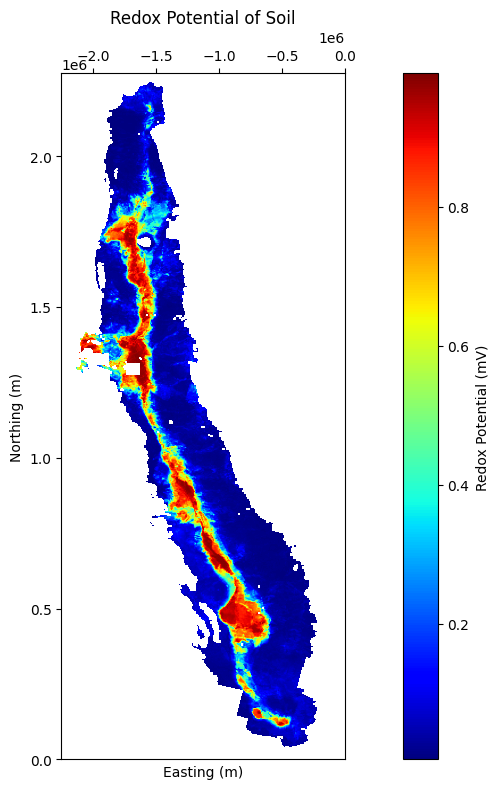

In [8]:
# Plot the data using matplotlib with the correct projection
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
im = ax.imshow(data, cmap='jet', extent=ds.GetGeoTransform(), origin='upper')
ax.set_title('Redox Potential of Soil')
ax.set_xlabel('Easting (m)')
ax.set_ylabel('Northing (m)')
fig.colorbar(im, ax=ax, orientation='vertical', label='Redox Potential (mV)')
ax.set_aspect(2.4) # 'equal'
ax.xaxis.tick_top()
plt.tight_layout()
plt.show()

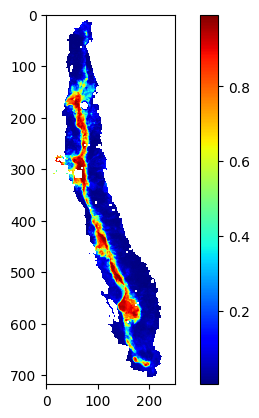

In [9]:
# Plot the data using matplotlib
plt.imshow(data, cmap='jet')
plt.colorbar()
plt.show()

In [10]:
import pyproj
from pyproj import CRS


In [11]:
def get_ascii_plot(file_loc,file_name,file_prj, fig_label,vmin_in,vmax_in, color_scheme = 'viridis'):
  
  # Open the raster dataset using GDAL
  ds = gdal.Open(file_loc + file_name)

  # Read the data as a numpy array
  data = ds.ReadAsArray()

  # Replace the NODATA values with NaN
  data[data == -9999] = np.nan

  # Replace the very small values with NaN
  # data[data < 1000] = np.nan

  # Calculate statistics of the data
  mean = np.nanmean(data)
  std_dev = np.nanstd(data)
  min_value = np.nanmin(data)
  max_value = np.nanmax(data)

  print(f"Mean: {mean}")
  print(f"Standard Deviation: {std_dev}")
  print(f"Min Value: {min_value}")
  print(f"Max Value: {max_value}")

  # Get the spatial reference from the projection file
  prj_file = open(file_loc + file_prj , 'r')
  prj_text = prj_file.read()
  prj_file.close()
  srs = osr.SpatialReference()
  srs.ImportFromWkt(prj_text)

  # Get the CRS as a proj string
  crs_proj4 = srs.ExportToProj4()
  print(f"Coordinate Reference System (CRS): {crs_proj4}")

  # Plot the data using matplotlib with the correct projection
  fig = plt.figure(figsize=(12,8))
  ax = fig.add_subplot(111)
  if vmin_in is not None:
    im = ax.imshow(data, cmap=color_scheme, vmin=vmin_in, vmax=vmax_in, extent=ds.GetGeoTransform(), origin='upper')
  if vmin_in is None:
    im = ax.imshow(data, cmap=color_scheme, extent=ds.GetGeoTransform(), origin='upper')

  ax.set_title(fig_label)
  ax.set_xlabel('Easting (m)')
  ax.set_ylabel('Northing (m)')
  fig.colorbar(im, ax=ax, orientation='vertical', label= fig_label)
  ax.set_aspect(2.4) # 'equal'
  ax.xaxis.tick_top()
  plt.tight_layout()
  plt.show()


Mean: 2178.857666015625
Standard Deviation: 5452.08544921875
Min Value: 41.13330841064453
Max Value: 1080604.0
Coordinate Reference System (CRS): +proj=aea +lat_0=23 +lon_0=-96 +lat_1=29.5 +lat_2=45.5 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs


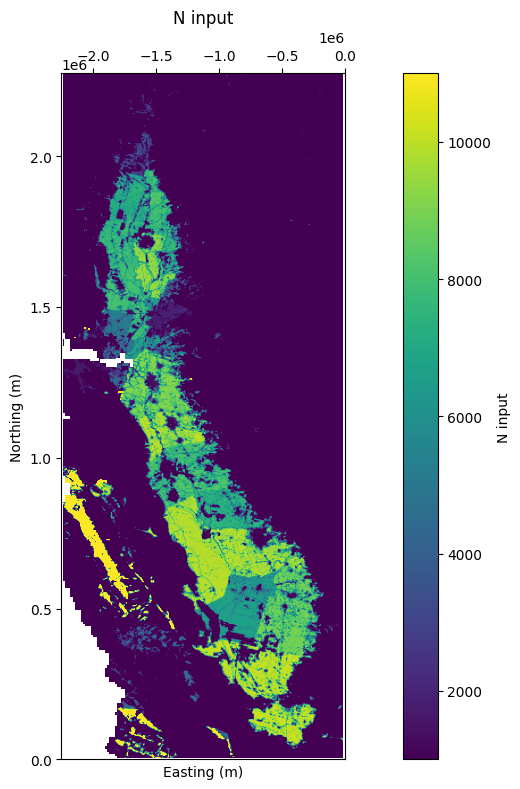

In [12]:
get_ascii_plot(file_loc = 'data_from_secondary_source_papers/katherine_etal_nitrate_predict/Nitrate_Model_Data_Release/', file_name = 'N_total.txt', 
               file_prj = 'array_projection_information.prj', fig_label = 'N input', vmin_in = 1000, vmax_in = 11000)

Mean: -3.8531601428985596
Standard Deviation: 21.308820724487305
Min Value: -34.64567184448242
Max Value: 107.36219787597656
Coordinate Reference System (CRS): +proj=aea +lat_0=23 +lon_0=-96 +lat_1=29.5 +lat_2=45.5 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs


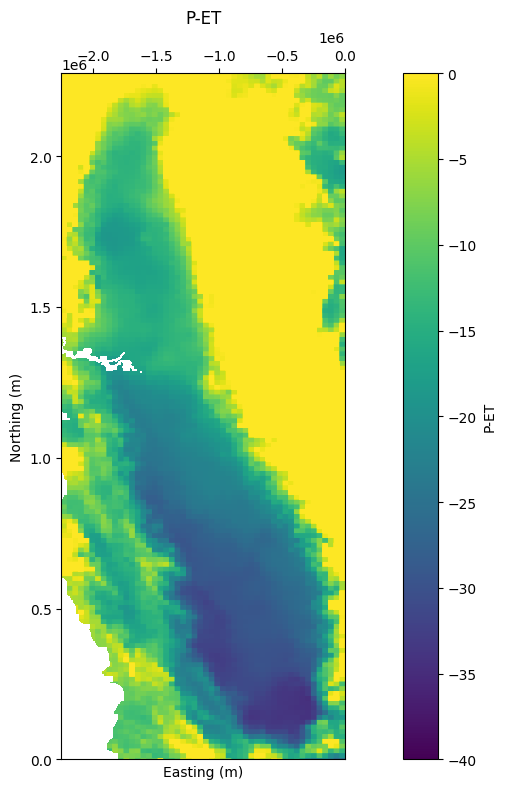

In [19]:
get_ascii_plot(file_loc = 'data_from_secondary_source_papers/katherine_etal_nitrate_predict/Nitrate_Model_Data_Release/', file_name = 'PrecipMinusETin_1971_2000_GWRP.txt', 
               file_prj = 'array_projection_information.prj', fig_label = 'P-ET', vmin_in = -40, vmax_in = 0)

Mean: 6430.42724609375
Standard Deviation: 7569.8740234375
Min Value: 0.0
Max Value: 60671.21875
Coordinate Reference System (CRS): +proj=aea +lat_0=23 +lon_0=-96 +lat_1=29.5 +lat_2=45.5 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs


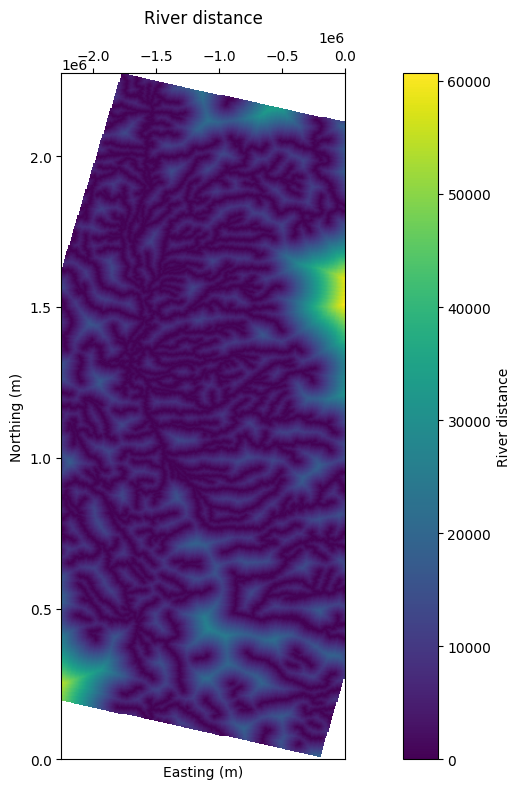

In [ ]:
get_ascii_plot(file_loc = 'data_from_secondary_source_papers/katherine_etal_nitrate_predict/Nitrate_Model_Data_Release/', file_name = 'RiverDist_NEAR.txt', 
               file_prj = 'array_projection_information.prj', fig_label = 'River distance', vmin_in = None, vmax_in = None)

Mean: 0.2028864175081253
Standard Deviation: 0.2855663597583771
Min Value: 0.0043918294832110405
Max Value: 0.9902442693710327
Coordinate Reference System (CRS): +proj=aea +lat_0=23 +lon_0=-96 +lat_1=29.5 +lat_2=45.5 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs


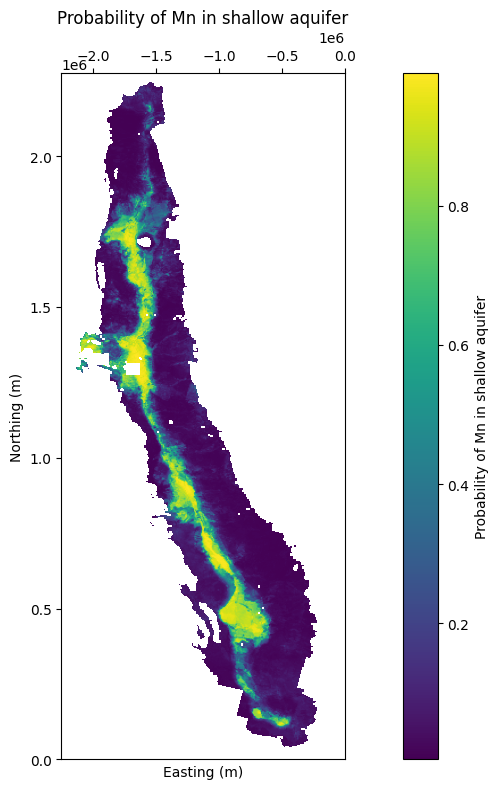

In [ ]:
get_ascii_plot(file_loc = 'data_from_secondary_source_papers/katherine_etal_nitrate_predict/Nitrate_Model_Data_Release/', file_name = 'ProbMn50ppb_Shallow.txt', 
               file_prj = 'array_projection_information.prj', fig_label = 'Probability of Mn in shallow aquifer', vmin_in = None, vmax_in = None)

Mean: 0.2116134613752365
Standard Deviation: 0.29047662019729614
Min Value: 0.0049384040758013725
Max Value: 0.9920807480812073
Coordinate Reference System (CRS): +proj=aea +lat_0=23 +lon_0=-96 +lat_1=29.5 +lat_2=45.5 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs


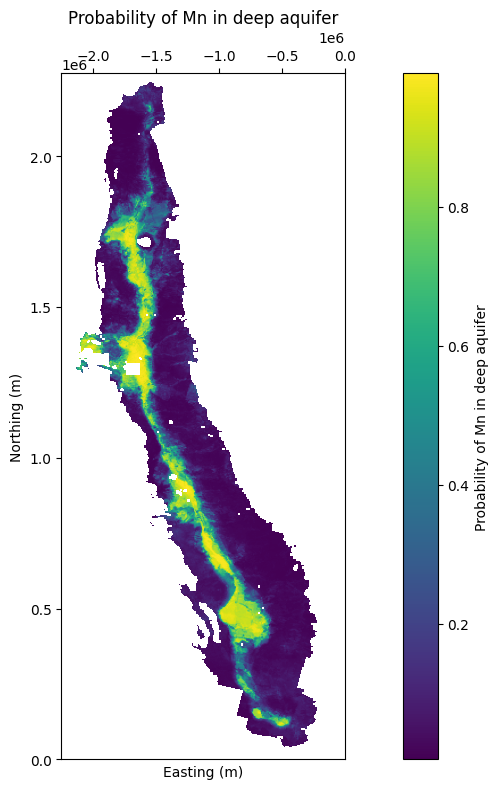

In [ ]:
get_ascii_plot(file_loc = 'data_from_secondary_source_papers/katherine_etal_nitrate_predict/Nitrate_Model_Data_Release/', file_name = 'ProbMn50ppb_Deep.txt', 
               file_prj = 'array_projection_information.prj', fig_label = 'Probability of Mn in deep aquifer', vmin_in = None, vmax_in = None)

Mean: -3.8531601428985596
Standard Deviation: 21.308820724487305
Min Value: -34.64567184448242
Max Value: 107.36219787597656
Coordinate Reference System (CRS): +proj=aea +lat_0=23 +lon_0=-96 +lat_1=29.5 +lat_2=45.5 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs


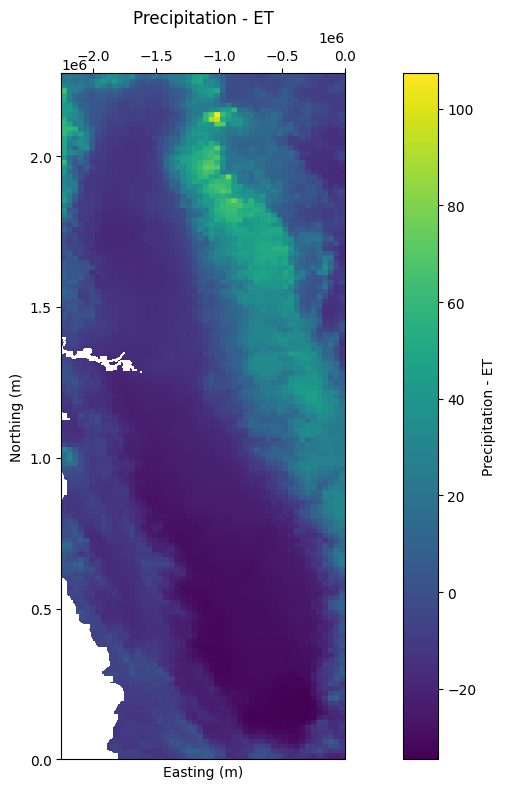

In [ ]:
get_ascii_plot(file_loc = 'data_from_secondary_source_papers/katherine_etal_nitrate_predict/Nitrate_Model_Data_Release/', file_name = 'PrecipMinusETin_1971_2000_GWRP.txt', 
               file_prj = 'array_projection_information.prj', fig_label = 'Precipitation - ET', vmin_in = None, vmax_in = None)

Mean: 3.3728129863739014
Standard Deviation: 2.5697028636932373
Min Value: 0.08661940693855286
Max Value: 31.218759536743164
Coordinate Reference System (CRS): 


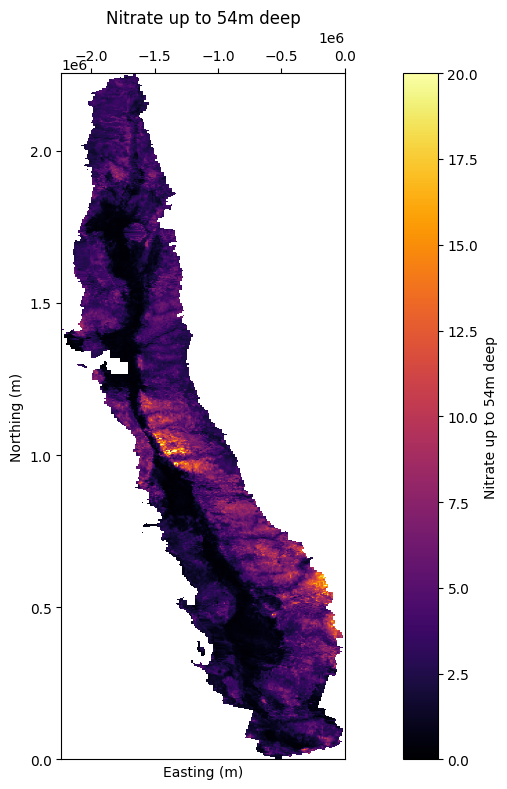

In [ ]:
get_ascii_plot(file_loc = 'data_from_secondary_source_papers/katherine_etal_nitrate_predict/Nitrate_Model_Data_Release/', file_name = 'no3_preds_3d_direct_extract180ft_54m.asc', 
               file_prj = 'NO3_preds_3D_direct_extract180ft_54m.prj', fig_label = 'Nitrate up to 54m deep', vmin_in = 0, vmax_in = 20,color_scheme = 'inferno')

Mean: 0.314592570066452
Standard Deviation: 0.2797170877456665
Min Value: 0.023439250886440277
Max Value: 0.9635884165763855
Coordinate Reference System (CRS): +proj=aea +lat_0=23 +lon_0=-96 +lat_1=29.5 +lat_2=45.5 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs


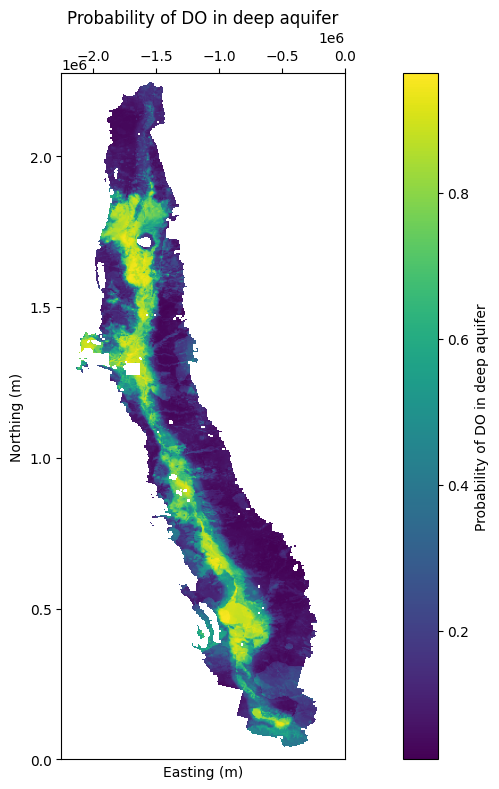

In [ ]:
get_ascii_plot(file_loc = 'data_from_secondary_source_papers/katherine_etal_nitrate_predict/Nitrate_Model_Data_Release/', file_name = 'ProbDOpt5ppm_Deep.txt', 
               file_prj = 'array_projection_information.prj', fig_label = 'Probability of DO in deep aquifer', vmin_in = None, vmax_in = None)

Mean: 0.3185342848300934
Standard Deviation: 0.28271496295928955
Min Value: 0.02355945110321045
Max Value: 0.9648088812828064
Coordinate Reference System (CRS): +proj=aea +lat_0=23 +lon_0=-96 +lat_1=29.5 +lat_2=45.5 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs


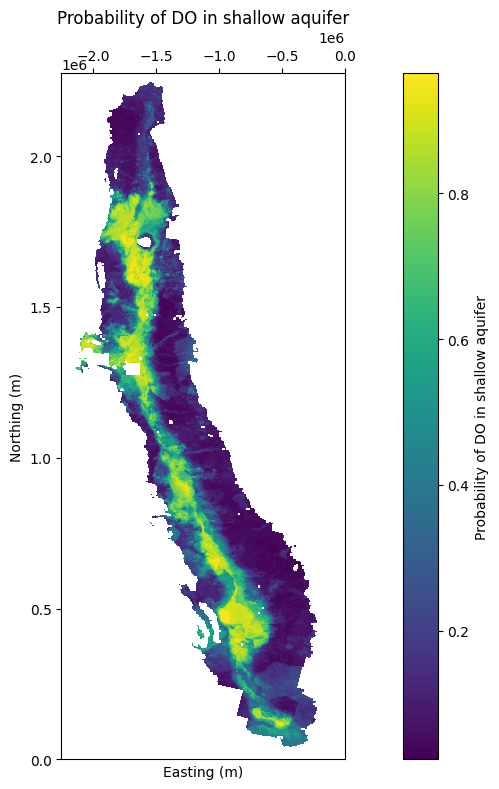

In [ ]:
get_ascii_plot(file_loc = 'data_from_secondary_source_papers/katherine_etal_nitrate_predict/Nitrate_Model_Data_Release/', file_name = 'ProbDOpt5ppm_Shallow.txt', 
               file_prj = 'array_projection_information.prj', fig_label = 'Probability of DO in shallow aquifer', vmin_in = None, vmax_in = None)

Mean: -425.1040344238281
Standard Deviation: 2695.126220703125
Min Value: -57474.23046875
Max Value: 37931.4296875
Coordinate Reference System (CRS): +proj=aea +lat_0=23 +lon_0=-96 +lat_1=29.5 +lat_2=45.5 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs


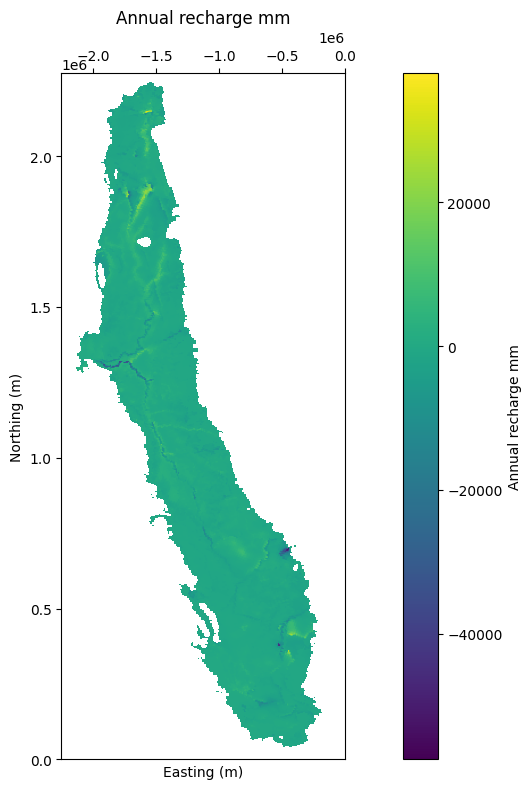

In [ ]:
get_ascii_plot(file_loc = 'data_from_secondary_source_papers/katherine_etal_nitrate_predict/Nitrate_Model_Data_Release/', file_name = 'MFVelFeb2000.txt', 
               file_prj = 'array_projection_information.prj', fig_label = 'Annual recharge mm', vmin_in = None, vmax_in = None)

In [ ]:

# Get the EPSG code for the CRS
srs.AutoIdentifyEPSG()
epsg_code = srs.GetAuthorityCode(None)
print(f"EPSG Code: {epsg_code}")

# crs_string = "+proj=aea +lat_0=23 +lon_0=-96 +lat_1=29.5 +lat_2=45.5 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs"
crs = CRS(crs_string)

# Try to find the EPSG code
epsg_code = crs.to_epsg(min_confidence=70)  # Adjust min_confidence if needed

if epsg_code:
    print(f"EPSG Code: {epsg_code}")
else:
    print("EPSG Code not found.")

EPSG Code: None


NameError: ignored

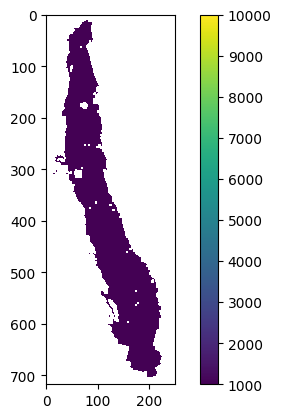

In [ ]:
# Plot the data using matplotlib
plt.imshow(data, cmap='viridis',vmin = 1000, vmax = 10000)
plt.colorbar()
plt.show()

In [ ]:
# Get the spatial reference from the projection file
prj_file = open(file_loc1 + 'preds_Mn50ugL_TD50ft.prj', 'r')
prj_text = prj_file.read()
prj_file.close()
srs = osr.SpatialReference()
srs.ImportFromWkt(prj_text)

# Get the CRS as a proj string
crs_proj4 = srs.ExportToProj4()
print(f"Coordinate Reference System (CRS): {crs_proj4}")

# Get the EPSG code for the CRS
srs.AutoIdentifyEPSG()
epsg_code = srs.GetAuthorityCode(None)
print(f"EPSG Code: {epsg_code}")

Coordinate Reference System (CRS): 
EPSG Code: None


## Export data to raster tif

In [ ]:
import os
import numpy as np
from osgeo import gdal, osr

def save_to_geotiff(file_loc, file_name, file_prj, output_file):

    # Open the raster dataset using GDAL
    ds = gdal.Open(file_loc + file_name)

    # Read the data as a numpy array
    data = ds.ReadAsArray()

    # Replace the NODATA values with NaN
    data[data == -9999] = np.nan

    # Get the spatial reference from the projection file
    prj_file = open(file_loc + file_prj, 'r')
    prj_text = prj_file.read()
    prj_file.close()
    srs = osr.SpatialReference()
    srs.ImportFromWkt(prj_text)

    # Get the CRS as a proj string
    crs_wkt = srs.ExportToWkt()

    # Open the original raster dataset using GDAL
    src_ds = gdal.Open(file_loc + file_name)

    # Get the necessary metadata from the original dataset
    geotransform = src_ds.GetGeoTransform()

    # Create the output GeoTIFF file
    driver = gdal.GetDriverByName("GTiff")
    dst_ds = driver.Create(output_file, data.shape[1], data.shape[0], 1, gdal.GDT_Float32)

    # Set the necessary metadata for the output GeoTIFF file
    dst_ds.SetGeoTransform(geotransform)
    dst_ds.SetProjection(crs_wkt)

    # Write the data to the output GeoTIFF file
    dst_ds.GetRasterBand(1).WriteArray(data)
    dst_ds.GetRasterBand(1).SetNoDataValue(np.nan)

    # Close the datasets
    src_ds = None
    dst_ds = None


In [ ]:
# Call the function to save the data as a GeoTIFF file
save_to_geotiff(file_loc = 'data_from_secondary_source_papers/katherine_etal_nitrate_predict/Nitrate_Model_Data_Release/', file_name = 'N_total.txt', 
               file_prj = 'array_projection_information.prj', output_file =  "katherine_etal_nitrate_predict/processed_raster/N_total.tif")

In [ ]:
# Call the function to save the data as a GeoTIFF file
save_to_geotiff(file_loc = 'data_from_secondary_source_papers/katherine_etal_nitrate_predict/Nitrate_Model_Data_Release/', file_name = 'ProbDOpt5ppm_Shallow.txt', 
               file_prj = 'array_projection_information.prj', output_file =  "katherine_etal_nitrate_predict/processed_raster/ProbDOpt5ppm_Shallow.tif")

In [ ]:
# Call the function to save the data as a GeoTIFF file
save_to_geotiff(file_loc = 'data_from_secondary_source_papers/katherine_etal_nitrate_predict/Nitrate_Model_Data_Release/', file_name = 'ProbDOpt5ppm_Deep.txt', 
               file_prj = 'array_projection_information.prj', output_file =  "katherine_etal_nitrate_predict/processed_raster/ProbDOpt5ppm_Deep.tif")

In [ ]:
# Call the function to save the data as a GeoTIFF file
save_to_geotiff(file_loc = 'data_from_secondary_source_papers/katherine_etal_nitrate_predict/Nitrate_Model_Data_Release/', file_name = 'ProbMn50ppb_Shallow.txt', 
               file_prj = 'array_projection_information.prj', output_file =  "katherine_etal_nitrate_predict/processed_raster/ProbMn50ppb_Shallow.tif")

In [ ]:
# Call the function to save the data as a GeoTIFF file
save_to_geotiff(file_loc = 'data_from_secondary_source_papers/katherine_etal_nitrate_predict/Nitrate_Model_Data_Release/', file_name = 'ProbMn50ppb_Deep.txt', 
               file_prj = 'array_projection_information.prj', output_file =  "katherine_etal_nitrate_predict/processed_raster/ProbMn50ppb_Deep.tif")

## Read the exported tif and plot

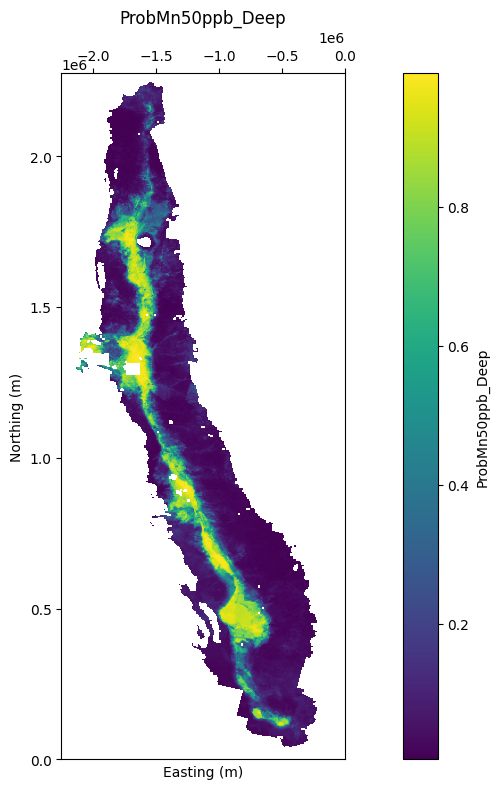

In [ ]:
def plot_geotiff(file_path, title, color_scheme='viridis', vmin=None, vmax=None):
    # Open the GeoTIFF file
    ds = gdal.Open(file_path)

    # Read the data as a numpy array
    data = ds.ReadAsArray()

    # Plot the data using matplotlib with the correct projection
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    if vmin is not None:
        im = ax.imshow(data, cmap=color_scheme, vmin=vmin, vmax=vmax, extent=ds.GetGeoTransform(), origin='upper')
    if vmin is None:
        im = ax.imshow(data, cmap=color_scheme, extent=ds.GetGeoTransform(), origin='upper')

    ax.set_title(title)
    ax.set_xlabel('Easting (m)')
    ax.set_ylabel('Northing (m)')
    fig.colorbar(im, ax=ax, orientation='vertical', label=title)
    ax.set_aspect(2.4)  # 'equal'
    ax.xaxis.tick_top()
    plt.tight_layout()
    plt.show()

# Call the function to plot the GeoTIFF file
plot_geotiff("data_from_secondary_source_papers/katherine_etal_nitrate_predict/processed_raster/ProbMn50ppb_Deep.tif", "ProbMn50ppb_Deep")

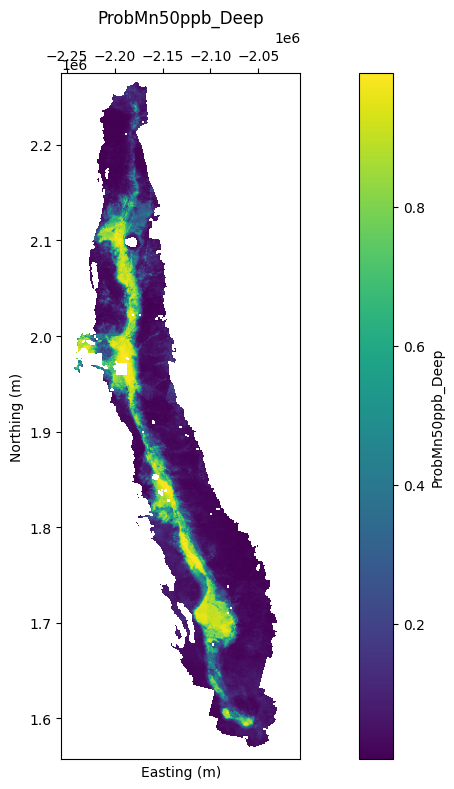

In [ ]:
def plot_geotiff_rasterio(file_path, title, color_scheme='viridis', vmin=None, vmax=None):
    # Open the GeoTIFF file using rasterio
    with rasterio.open(file_path) as src:
        data = src.read(1)
        transform = src.transform

    # Plot the data using matplotlib with the correct projection
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    if vmin is not None:
        im = ax.imshow(data, cmap=color_scheme, vmin=vmin, vmax=vmax, extent=[transform[2], transform[2] + transform[0]*src.width, transform[5] + transform[4]*src.height, transform[5]], origin='upper')
    if vmin is None:
        im = ax.imshow(data, cmap=color_scheme, extent=[transform[2], transform[2] + transform[0]*src.width, transform[5] + transform[4]*src.height, transform[5]], origin='upper')

    ax.set_title(title)
    ax.set_xlabel('Easting (m)')
    ax.set_ylabel('Northing (m)')
    fig.colorbar(im, ax=ax, orientation='vertical', label=title)
    ax.set_aspect(1)  # 'equal'
    ax.xaxis.tick_top()
    plt.tight_layout()
    plt.show()

# Call the function to plot the GeoTIFF file
plot_geotiff_rasterio("data_from_secondary_source_papers/katherine_etal_nitrate_predict/processed_raster/ProbMn50ppb_Deep.tif", "ProbMn50ppb_Deep")

## Checking the CRS

In [ ]:
def print_crs(file_path):
    with rasterio.open(file_path) as src:
        crs = src.crs
        print(f"Coordinate Reference System (CRS): {crs}")

# Call the function to print the CRS of the GeoTIFF file
print_crs("data_from_secondary_source_papers/katherine_etal_nitrate_predict/processed_raster/ProbMn50ppb_Deep.tif")

Coordinate Reference System (CRS): ESRI:102039


## Extract data inside well buffer

In [ ]:
import geopandas as gpd
import pandas as pd
import rasterio
from shapely.geometry import Point
import rasterio.features
import warnings
from affine import Affine
from tqdm import tqdm

In [ ]:
data_sources = ['N_total','ProbDOpt5ppm_Deep','ProbDOpt5ppm_Shallow','ProbMn50ppb_Deep','ProbMn50ppb_Shallow','ScreenLength_Shallow','ScreenLength_Deep','LateralPosition', #7
                'Ngw_1975','RiverDist_NEAR','CVHM_TextZone','PrecipMinusETin_1971_2000_GWRP','DTW60YrJurgens','CAML1990_natural_water','RechargeAnnualmmWolock', # 14
                'HiWatTabDepMin','MFVelFeb2000','MFVelSept2000','HydGrp_C'] #15
# file_name = data_sources[15]

def get_data_for_wellrads(data_sources = data_sources, rad_input = 1):
  for file_name in tqdm(data_sources):
    # Read the .prj file
    file_loc1 = 'data_from_secondary_source_papers/katherine_etal_nitrate_predict/Nitrate_Model_Data_Release/'
    prj_file = open(file_loc1 + 'array_projection_information.prj', 'r')
    prj_text = prj_file.read()

    # Use the spatial reference from EPSG:5070 (NAD83 / Conus Albers)
    srs = osr.SpatialReference()
    srs.ImportFromEPSG(5070)
    wkt = srs.ExportToWkt()

    # Open the raster dataset using GDAL
    ds = gdal.Open(file_loc1 + f'{file_name}.txt', gdal.GA_Update)

    # Set the raster dataset's spatial reference using the WKT
    ds.SetProjection(wkt)

    # Read the raster data into a NumPy array
    data = ds.ReadAsArray()

    # Get the geo-transform information
    gt = ds.GetGeoTransform()

    # Save the raster dimensions
    raster_x_size = ds.RasterXSize
    raster_y_size = ds.RasterYSize

    # Close the dataset
    ds = None

    # Define the extent of the plot
    extent = (gt[0], gt[0] + raster_x_size * gt[1], gt[3] + raster_y_size * gt[5], gt[3])

    # # Plot the data using matplotlib with the correct projection
    # fig = plt.figure(figsize=(12,8))
    # ax = fig.add_subplot(111)
    # im = ax.imshow(data, cmap='jet', extent=extent, origin='upper',vmin=0, vmax=1)
    # ax.set_title('Redox Potential of Soil')
    # ax.set_xlabel('Easting (m)')
    # ax.set_ylabel('Northing (m)')
    # fig.colorbar(im, ax=ax, orientation='vertical', label='Redox Potential (mV)')
    # # ax.set_aspect(2.4) # 'equal'
    # ax.xaxis.tick_top()
    # plt.tight_layout()
    # plt.show()

    # Read well data
    df_well = pd.read_csv("shapefiles/GAMA_wells.csv")

    # Create a GeoDataFrame from the well information DataFrame
    gdf_wells = gpd.GeoDataFrame(df_well, geometry=gpd.points_from_xy(df_well['APPROXIMATE LONGITUDE'], df_well['APPROXIMATE LATITUDE']),crs={'init': 'epsg:4326'})

    # Reproject gdf_wells to the same CRS as the raster data (EPSG:5070)
    gdf_wells = gdf_wells.to_crs('EPSG:5070')

    # Spatial plot of wells over the raster data 

    #===================================
    # Plot
    #===================================
    # # Create a new figure and axis
    # fig, ax = plt.subplots(figsize=(10, 10))

    # # Plot the raster data
    # im = ax.imshow(data, extent=extent, cmap='viridis', origin='upper',vmin=0, vmax=1)

    # # Plot the well points over the raster data
    # gdf_wells.plot(ax=ax, markersize=.3, color='red', edgecolor=None, marker='o', zorder=5)

    # # Customize the plot appearance
    # ax.set_title('Well Data Over Raster')
    # ax.set_xlabel('X Coordinate (m)')
    # ax.set_ylabel('Y Coordinate (m)')

    # # Add a colorbar
    # cbar = fig.colorbar(im, ax=ax)
    # cbar.set_label('Raster Values')

    # # Show the plot
    # plt.show()
    #===================================



    ## Creating well buffer
    # export well buffer shapefile of user given radius (miles)
    def get_well_buffer_shape(df,rad_buffer = 2):
        
        if 'APPROXIMATE LONGITUDE' in df:
            # Create a example dataframe with lat and lon columns
            # df = pd.DataFrame({'well_id':df['WELL ID'],'lat':df['APPROXIMATE LATITUDE'], 'lon':df['APPROXIMATE LONGITUDE']})
            df.rename(columns = {'APPROXIMATE LATITUDE': 'lat', 'APPROXIMATE LONGITUDE':'lon'}, inplace = True)
        if 'WELL ID' in df:
            # Create a example dataframe with lat and lon columns
            df.rename(columns = {'WELL ID': 'well_id'}, inplace = True)

        # Convert latitude and longitude columns to shapely Points
        geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]

        # Create a GeoDataFrame
        crs = {'init': 'epsg:4326'} # CRS stands for Coordinate Reference System, this line specify the system
        gdf2 = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

        # # Convert the CRS of the GeoDataFrame to a projected CRS (e.g. UTM zone 10N)
        gdf_buffer = gdf2.to_crs({'init': 'epsg:32610'})

        # # Create a buffer of 2 miles in the projected CRS
        gdf_buffer.geometry = gdf_buffer.buffer(1609.345 * rad_buffer)

        # # Convert the CRS back to WGS 84
        gdf_buffer = gdf_buffer.to_crs({'init': 'epsg:4326'})

        return gdf_buffer

    # Create well buffer using the function
    rad_buffer = rad_input # miles
    # Creating buffer around wells
    gdf_wellbuffer_all = get_well_buffer_shape(gdf_wells,rad_buffer = rad_buffer) 

    # read cv shapefile
    cv = gpd.read_file('shapefiles/cv.shp')
    cv.to_crs(epsg='4326', inplace=True)

    # Perform  clip on the well data based on selected boundary
    gdf_wellbuffer = gpd.sjoin(gdf_wellbuffer_all, cv, how='inner', op='within')




    # Assuming 'wells' is a GeoDataFrame containing well geometries and 'var' is the raster data
    results = {'well_id': [], 'mean_value': []}

    affine_transform = Affine.from_gdal(*gt)

    # Assuming 'gdf_wellbuffer' is a GeoDataFrame containing well geometries
    results = {'well_id': [], 'mean_value': []}

    # Reproject gdf_wellbuffer to the same CRS as the raster data (EPSG:5070)
    gdf_wellbuffer = gdf_wellbuffer.to_crs('EPSG:5070')

    # Loop through each well and calculate the area for each category
    n_count = 0
    warnings.filterwarnings("ignore")
    for well in gdf_wellbuffer.itertuples():
        n_count += 1
        mask = rasterio.features.geometry_mask([well.geometry], transform=affine_transform, out_shape=data.shape, invert=True)
        masked_var = np.ma.masked_array(data, mask=~mask)
        results['well_id'].append(well.well_id)  # Assuming the well_id is stored in an 'id' attribute
        results['mean_value'].append(np.nanmean(masked_var))


    # Create a DataFrame from the results dictionary
    df = pd.DataFrame(results)


    # Export the DataFrame to a CSV file
    df.to_csv(f"data_from_secondary_source_papers/katherine_etal_nitrate_predict/processed_csv/{file_name}_rad_{rad_buffer}mil.csv")


In [ ]:
get_data_for_wellrads(data_sources = data_sources, rad_input = 1) # for radius 1

  0%|          | 0/19 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `pred

In [ ]:
get_data_for_wellrads(data_sources = data_sources, rad_input = .5) # for radius 0.5

100%|██████████| 19/19 [1:15:03<00:00, 237.02s/it]


In [ ]:
get_data_for_wellrads(data_sources = data_sources, rad_input = 2) # for radius 2

  0%|          | 0/19 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `pred

In [ ]:
get_data_for_wellrads(data_sources = data_sources, rad_input = 3) # for radius 3

100%|██████████| 19/19 [1:09:17<00:00, 218.82s/it]


In [ ]:
get_data_for_wellrads(data_sources = data_sources, rad_input = 4) # for radius 4

  0%|          | 0/19 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `pred

In [ ]:
get_data_for_wellrads(data_sources = data_sources, rad_input = 1.5) # for radius 1.5

100%|██████████| 19/19 [1:14:20<00:00, 234.74s/it]


In [ ]:
get_data_for_wellrads(data_sources = data_sources, rad_input = 2.5) # for radius 2.5

100%|██████████| 19/19 [1:10:47<00:00, 223.53s/it]


In [ ]:
get_data_for_wellrads(data_sources = data_sources, rad_input = 3.5) # for radius 3.5

100%|██████████| 19/19 [1:07:39<00:00, 213.63s/it]
